In [50]:
import pandas as pd
import os

In [51]:
housing_path = os.path.join("datasets", "housing")
csv_path = os.path.join(housing_path, "housing.csv")

In [52]:
data = pd.read_csv(csv_path)

In [53]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [54]:
data.columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [55]:
data.shape

(20640, 10)

In [56]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [57]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a28977f98>,
      dtype=object)

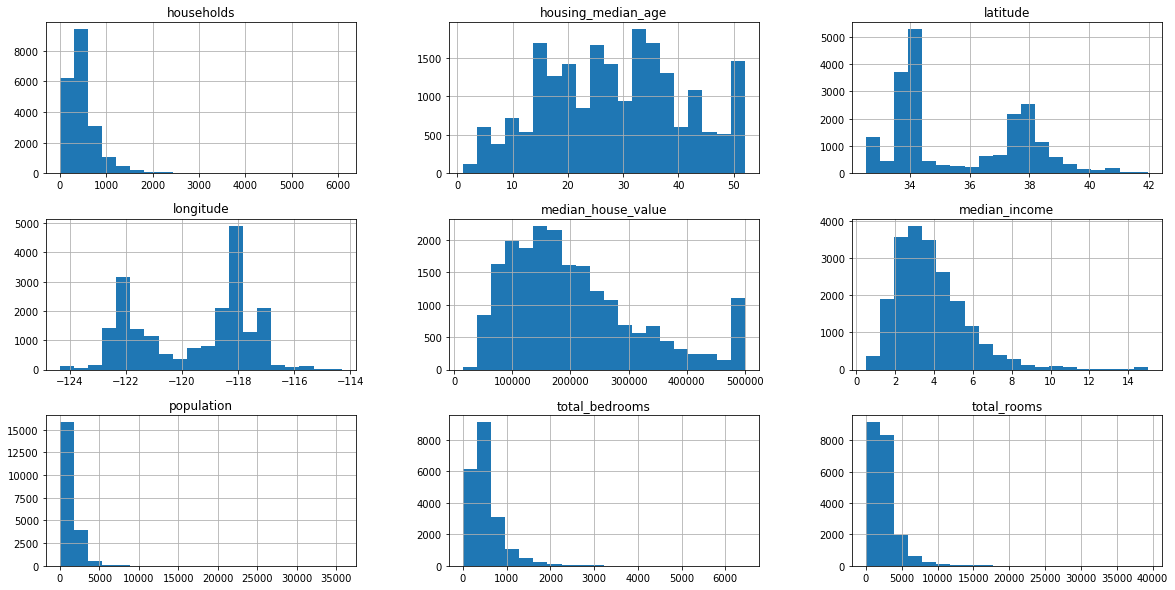

In [58]:
data.hist(bins=20, figsize=(20,10))

In [59]:
data[data["total_rooms"]==39320.000000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13139,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND


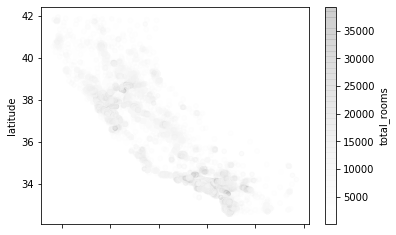

In [60]:
data.plot(kind="scatter", x="longitude", y="latitude", c="total_rooms", alpha=0.1)

In [61]:
from sklearn.model_selection import train_test_split
import numpy as np

In [62]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [63]:
train_set.shape

(16512, 10)

In [86]:
train_set_label = train_set["median_house_value"] 
train_set = train_set.drop("median_house_value", axis = 1)

In [87]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
train_set_num = train_set.drop("ocean_proximity", axis=1)
train_set_cat = train_set[["ocean_proximity"]]

In [88]:
train_set_num.columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [89]:
imputer.fit(train_set_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [90]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [91]:
X = imputer.transform(train_set_num)

In [92]:
train_set_num_tr = pd.DataFrame(X, columns=train_set_num.columns, index=train_set_num.index)

In [93]:
train_set_num_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB


In [94]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
train_set_cat_onehot = cat_encoder.fit_transform(train_set_cat)

In [95]:
len(train_set_cat_onehot.toarray())

16512

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [97]:
num_pipeline = Pipeline ([("imputer", SimpleImputer(strategy="median")), 
                          ("std_scalar", StandardScaler()),])

cat_pipeline = Pipeline ([("onehot", OneHotEncoder()), 
                         ])

In [98]:
train_set_num_tr = num_pipeline.fit_transform(train_set_num)

In [99]:
train_set_num_tr

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.76827628,
         0.32290591, -0.326196  ],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.09890135,
         0.6720272 , -0.03584338],
       [-0.44760309, -0.46014647, -1.95271028, ..., -0.44981806,
        -0.43046109,  0.14470145],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.28983345,
         0.07090859, -0.49697313],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.30830275,
         0.15490769,  0.96545045],
       [-1.41489815,  0.99543676,  1.85617335, ...,  1.04883375,
         1.94776365, -0.68544764]])

In [100]:
from sklearn.compose import ColumnTransformer

num_att = list(train_set_num)
cat_att = ["ocean_proximity"]

full_pipeline = ColumnTransformer([("num", num_pipeline, num_att),
                                  ("cat", cat_pipeline, cat_att),])
train_set_prepared = full_pipeline.fit_transform(train_set)

In [101]:
train_set_prepared

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  0.        ,
         1.        ,  0.        ]])

In [102]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(train_set_prepared, train_set_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
linear_reg.rank_

12

In [105]:
from sklearn.metrics import mean_squared_error

predictions_housing = linear_reg.predict(train_set_prepared)
lin_mse = mean_squared_error(train_set_label, predictions_housing)

In [106]:
lin_mse

4683203783.504253

In [107]:
np.sqrt(lin_mse)

68433.93736666226

In [108]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_set_prepared, train_set_label)
housing_prediction = tree_reg.predict(train_set_prepared)

In [109]:
tree_mse = mean_squared_error(train_set_label, housing_prediction)

In [110]:
tree_mse

0.0